## Домашнее задание к занятию от 12.09.2019 г. «Основы описательной статистики, виды распределений в Python»
ФИО: Кривова Татьяна Сергеевна

In [2]:
import pandas as pd
import pandas_profiling
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as sts
import statistics

Загрузить датасет по url:


In [3]:
url = "http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df = pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [5]:
df.head(10) # df.shape --> (156, 11)

,Country_(region),Ladder,SD_of_Ladder,Positive_affect,Negative_affect,Social_support,Freedom,Corruption,Generosity,Log_of_GDP\nper_capita,Healthy_life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


In [4]:
# Подробный отчет по датасету
pandas_profiling.ProfileReport(df)

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

In [6]:
df[df.Freedom.isna()] # смотрю страну с отсутствующим значением Freedom, NaN

filtered_table = df[df.Freedom.notna()]

,Country_(region),Ladder,SD_of_Ladder,Positive_affect,Negative_affect,Social_support,Freedom,Corruption,Generosity,Log_of_GDP\nper_capita,Healthy_life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


(array([6., 5., 5., 5., 5., 5., 5., 6., 5., 5., 5., 5., 5., 5., 5., 6., 5.,
        5., 5., 5., 5., 5., 6., 5., 5., 5., 5., 5., 5., 6.]),
 array([  1.        ,   6.13333333,  11.26666667,  16.4       ,
         21.53333333,  26.66666667,  31.8       ,  36.93333333,
         42.06666667,  47.2       ,  52.33333333,  57.46666667,
         62.6       ,  67.73333333,  72.86666667,  78.        ,
         83.13333333,  88.26666667,  93.4       ,  98.53333333,
        103.66666667, 108.8       , 113.93333333, 119.06666667,
        124.2       , 129.33333333, 134.46666667, 139.6       ,
        144.73333333, 149.86666667, 155.        ]),
 <a list of 30 Patch objects>)

Text(0.5, 1.0, 'Частотный график для параметра Freedom (plt.hist)')

Text(0.5, 0, 'Freedom_values')

Text(0, 0.5, 'Frequency')

(0, 160)

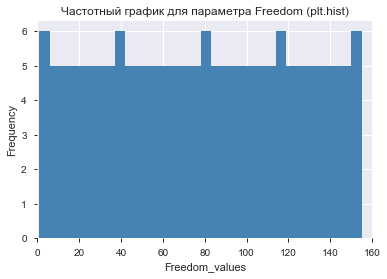

In [7]:
plt.hist(filtered_table.Freedom, bins=30, color="steelblue") # Вывод: равномерное распределение

plt.title('Частотный график для параметра Freedom (plt.hist)')
plt.grid(True)
plt.xlabel('Freedom_values')
plt.ylabel('Frequency')
plt.xlim(0,160)

Text(0.5, 1.0, 'Частотный график для параметра Positive_affect (sns.distplot)')

Text(0.5, 0, 'Positive_affect_values')

Text(0, 0.5, 'Frequency')

(-50, 250)

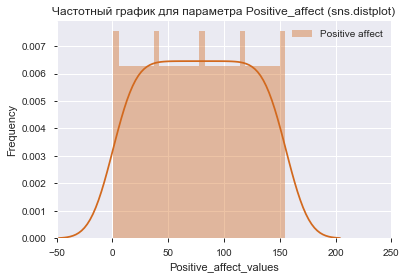

In [8]:
sns.distplot(filtered_table['Positive_affect'], bins=30, color="chocolate", label='Positive affect')
# Вывод: равномерное распределение

plt.title('Частотный график для параметра Positive_affect (sns.distplot)')
plt.grid(True)
plt.xlabel('Positive_affect_values')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(-50,250)

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [9]:
filtered_table.Freedom.describe()

count    155.000000
mean      78.000000
std       44.888751
min        1.000000
25%       39.500000
50%       78.000000
75%      116.500000
max      155.000000
Name: Freedom, dtype: float64

In [10]:
print(f'Значения для колонки Freedom:\n\tМедиана {statistics.median(filtered_table.Freedom)}')

try:
    print(f'\tМода {statistics.mode(filtered_table.Freedom)}')
except Exception as ex:
    print('Внимание:', ex)

print(f'\tМатематическое ожидание {statistics.mean(filtered_table.Freedom)}\n\
        Стандартное отклонение {round(statistics.stdev(filtered_table.Freedom), 3)}\n\
        Дисперсия {statistics.variance(filtered_table.Freedom)}\n\
        Минимальное значение {min(filtered_table.Freedom)}\n\
        Максимальное значение {max(filtered_table.Freedom)}\n\
        Размах {max(filtered_table.Freedom) - min(filtered_table.Freedom)}')

Значения для колонки Freedom:
	Медиана 78.0
Внимание: no unique mode; found 155 equally common values
	Математическое ожидание 78.0
        Стандартное отклонение 44.889
        Дисперсия 2015.0
        Минимальное значение 1.0
        Максимальное значение 155.0
        Размах 154.0


In [11]:
# Второй способ для подсчета стандартного отклонения (Сигма) и дисперсии (Сигма^2)
def sigma(nums):
    differences = 0
    avg = sum(nums)/len(nums)
    for n in nums:
        differences += (n - avg)**(2)
    return (differences/(len(nums)-1))**(0.5)

sigma(filtered_table.Freedom)

sigma(filtered_table.Freedom)**2

44.88875137492688

2015.0000000000002

0

Text(0.5, 1.0, 'Ящик с усами для параметра Freedom (sns.boxplot)')

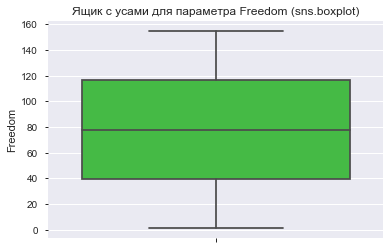

In [12]:
# Смотрим, есть ли выбросы:
len(filtered_table[ filtered_table.Freedom.isnull() ]) # отсутствующих значений нет, т.к. Qatar отфильтровали ранее

sns.boxplot(y=filtered_table.Freedom, color="limegreen")
plt.title('Ящик с усами для параметра Freedom (sns.boxplot)') # Вывод: выбросов нет

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Text(0.5, 1.0, 'Точечный график зависимости двух выборок Freedom и Positive_affect (plt.scatter)')

Text(0.5, 0, 'Freedom')

Text(0, 0.5, 'Positive_affect')

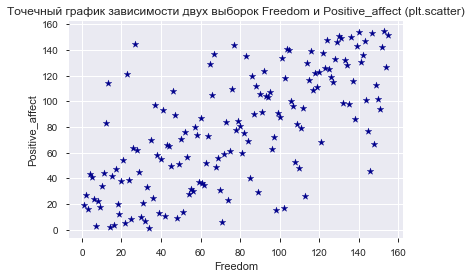

In [13]:
plt.scatter(filtered_table.Freedom, filtered_table.Positive_affect, color="darkblue", marker="*")

plt.title('Точечный график зависимости двух выборок Freedom и Positive_affect (plt.scatter)')
plt.xlabel('Freedom')
plt.ylabel('Positive_affect')
plt.grid(True)

In [14]:
print(f'Коэффициент Пирсона: {round(np.corrcoef(filtered_table.Freedom, filtered_table.Positive_affect)[0,1], 3)}')

# второй способ для расчета коэффициента Пирсона
sts.pearsonr(filtered_table.Freedom, filtered_table.Positive_affect)

Коэффициент Пирсона: 0.682


(0.6817698430601657, 1.5956279484809605e-22)

In [15]:
#help(sts.pearsonr)
#Положительный знак Коэффициента Пирсона означает, что при возрастании x возрастает y. 
#Отрицательный - что при возрастании x, y уменьшается.

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [16]:
freedom_centered = filtered_table.Freedom - statistics.mean(filtered_table.Freedom) # центрирование

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
freedom_normalized = min_max_scaler.fit_transform(np.array(freedom_centered).reshape(-1, 1)) # масштабирование

# добавляю нормализованный столбец в датафрейм
filtered_table = filtered_table.assign(normalized=pd.Series(freedom_normalized.reshape(1,155)[0]).values)

filtered_table.head()

,Country_(region),Ladder,SD_of_Ladder,Positive_affect,Negative_affect,Social_support,Freedom,Corruption,Generosity,Log_of_GDP\nper_capita,Healthy_life\nexpectancy,normalized
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,-0.948052
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,-0.935065
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,-0.974026
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,-0.922078
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,-0.766234


Построить матрицу корреляций для всех колонок таблицы

In [17]:
corr = filtered_table.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,Ladder,SD_of_Ladder,Positive_affect,Negative_affect,Social_support,Freedom,Corruption,Generosity,Log_of_GDP per_capita,Healthy_life expectancy,normalized
Ladder,1,0.543,0.491,0.524,0.818,0.547,0.19,0.498,0.812,0.816,0.547
SD_of_Ladder,0.543,1,0.0854,0.619,0.599,0.252,0.259,0.392,0.638,0.613,0.252
Positive_affect,0.491,0.0854,1,0.39,0.386,0.682,0.21,0.355,0.305,0.333,0.682
Negative_affect,0.524,0.619,0.39,1,0.622,0.43,0.159,0.338,0.542,0.489,0.43
Social_support,0.818,0.599,0.386,0.622,1,0.449,0.118,0.442,0.773,0.741,0.449
Freedom,0.547,0.252,0.682,0.43,0.449,1,0.381,0.49,0.41,0.416,1
Corruption,0.19,0.259,0.21,0.159,0.118,0.381,1,0.266,0.199,0.123,0.381
Generosity,0.498,0.392,0.355,0.338,0.442,0.49,0.266,1,0.479,0.432,0.49
Log_of_GDP per_capita,0.812,0.638,0.305,0.542,0.773,0.41,0.199,0.479,1,0.849,0.41
Healthy_life expectancy,0.816,0.613,0.333,0.489,0.741,0.416,0.123,0.432,0.849,1,0.416


Загрузить следующую таблицу: 

In [18]:
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

Text(0.5, 1.0, 'Частотный график для параметра AveragePrice (sns.distplot)')

Text(0, 0.5, 'Frequency')

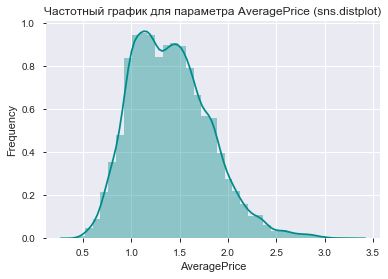

In [19]:
#df.info()
#df.AveragePrice.isna().sum() # нет отсутствующих значений

sns.distplot(df.AveragePrice, bins=35, color="darkcyan")
# Вывод: нормальное распределение

plt.title('Частотный график для параметра AveragePrice (sns.distplot)')
plt.grid(True)
plt.ylabel('Frequency')

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [20]:
sts.pearsonr(df.AveragePrice, df['4046'])

(-0.20831704848788463, 4.594934299445524e-178)

Text(0, 0.5, 'AveragePrice')

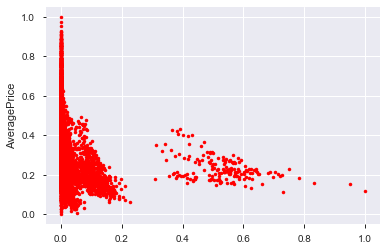

In [24]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['4046', 'AveragePrice']])
df_norm = pd.DataFrame(np_scaled)

plt.plot(df_norm[0], df_norm[1], 'r.')
plt.ylabel('AveragePrice')